In [1]:
from matplotlib import rc
from lmfit import Model



rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image
from  matplotlib.patches import Rectangle
from skimage.io import imread

In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48/4, 2.75/4),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
from scipy.fft import fft2, fftshift, rfft2
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrowPatch, ConnectionPatch
from scipy.interpolate import interp2d



In [4]:
mfm_61 = imread('20220114_LL_(61_glas)/ds211221_amplitude_blackwhite.png')
mfm_61_crop = mfm_61[14:269, 9:264][:,:,0]
mfm_61_crop_half = mfm_61_crop[:128,:128]

mfm_116 = imread('20220202_LL_(116 SiN)/ds220126_R1_membrane_amplitude_blackwhite.png')
mfm_116_crop = mfm_116[14:269, 9:264][:,:,0]


In [5]:
print(mfm_61_crop.shape)

(255, 255)


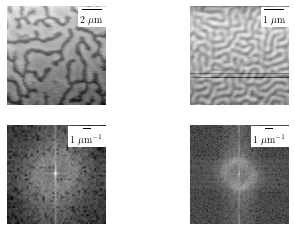

In [6]:
%matplotlib inline
fig, axes = plt.subplots(2,2)

scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter
for ax in axes.flatten():
    ax.axis('off')
norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes[0][0].imshow(norm_61,cmap='gray')
axes[0][1].imshow(norm_116,cmap='gray')

axes[0][0].add_artist(scalebar_61)
axes[0][1].add_artist(scalebar_116)

scalebar_61_ft = ScaleBar(2*np.pi*2./51., '1/um', dimension='si-length-reciprocal', fixed_value=1) # 1 pixel = 0.2 meter
scalebar_116_ft = ScaleBar(2*np.pi*1./51., '1/um', dimension='si-length-reciprocal', fixed_value=1) # 1 pixel = 0.2 meter

ft_mfm_61 = np.abs(fftshift(fft2(norm_61)))[128-25:128+25,128-25:128+25]
ft_mfm_116 = np.abs(fftshift(fft2(norm_116)))[128-50:128+50,128-50:128+50]
axes[1][0].imshow(np.log(ft_mfm_61),cmap='gray')
axes[1][1].imshow(np.log(ft_mfm_116),cmap='gray')
axes[1][0].add_artist(scalebar_61_ft)
axes[1][1].add_artist(scalebar_116_ft)

[1.62 1.62]


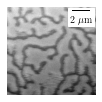

In [16]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes.imshow(norm_61,cmap='gray')
axes.axis('off')
axes.add_artist(scalebar_61)
fig.savefig('61_real.pgf', bbox_inches='tight', pad_inches=0.0)

<IPython.core.display.Javascript object>


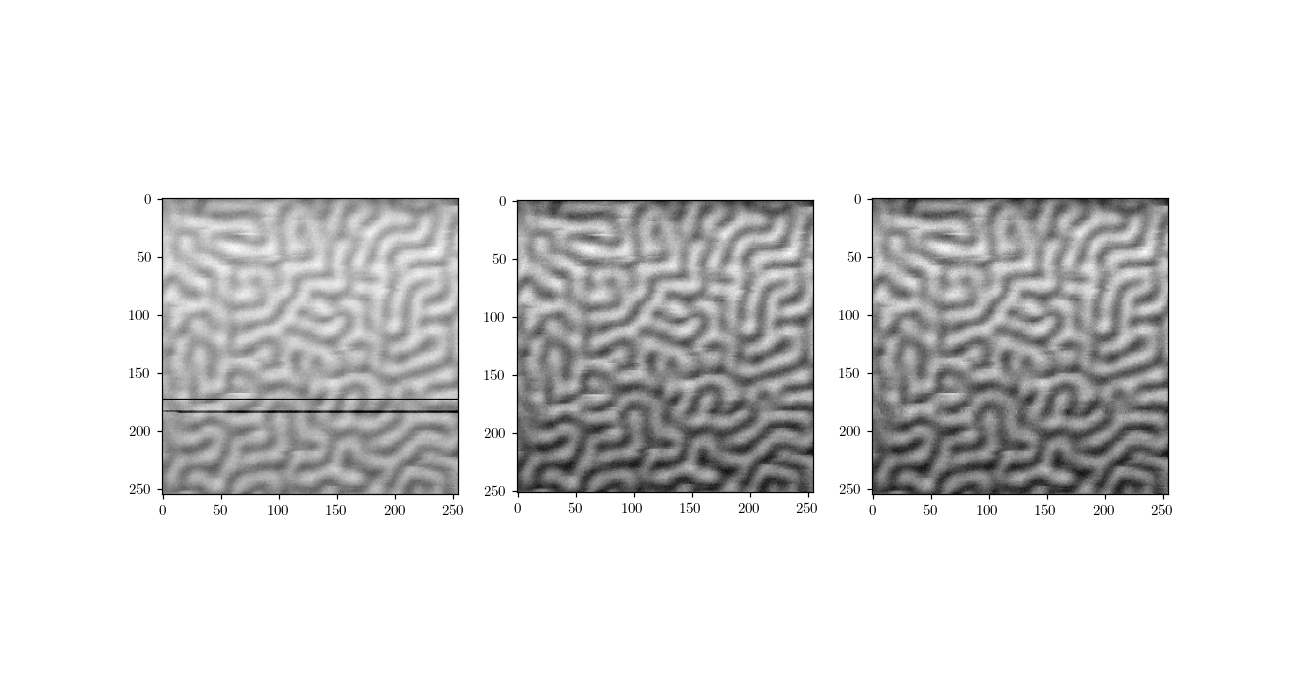

(255, 255)
(252, 255)
(255, 255)


In [33]:
%matplotlib notebook
fig,axes = plt.subplots(1,3)
norm_116_without_lines = np.delete(norm_116, [173,184,183], axis=0)
axes[0].imshow(norm_116,cmap='gray')

print(norm_116.shape)
x = np.arange(0, 255)
y = np.arange(0, 255)

y_without_lines = np.delete(y,[184,183,173])

f = interp2d(x, y_without_lines, norm_116_without_lines, kind='cubic')

fixed_116 = f(x,y)

axes[1].imshow(norm_116_without_lines, cmap='gray')
print(norm_116_without_lines.shape)

axes[2].imshow(fixed_116, cmap='gray')
print(fixed_116.shape)

[1.62 1.62]


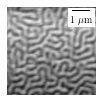

In [34]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = fixed_116/np.max(fixed_116)
axes.imshow(norm_116,cmap='gray')
axes.axis('off')
axes.add_artist(scalebar_116)
plt.savefig('116_real.pgf', bbox_inches='tight', pad_inches=0.0)

[1.62 1.62]


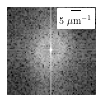

In [19]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes.imshow(norm_61,cmap='gray')
axes.axis('off')
scalebar_61_ft = ScaleBar(2*np.pi/10., '1/um', dimension='si-length-reciprocal', fixed_value=5) # 1 pixel = 0.2 meter

ft_mfm_61 = np.abs(fftshift(fft2(norm_61)))[128-35:128+35,128-35:128+35]
axes.imshow(np.log(ft_mfm_61),cmap='gray', vmin=0, vmax=8)
axes.add_artist(scalebar_61_ft)
fig.savefig('61_ft.pgf', bbox_inches='tight', pad_inches=0.0)

[1.62 1.62]


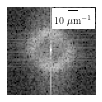

In [20]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes.imshow(norm_61,cmap='gray')
axes.axis('off')
scalebar_116_ft = ScaleBar(2*np.pi/5., '1/um', dimension='si-length-reciprocal', fixed_value=10) # 1 pixel = 0.2 meter

ft_mfm_116 = np.abs(fftshift(fft2(norm_116)))[128-35:128+35,128-35:128+35]
axes.imshow(np.log(ft_mfm_116),cmap='gray', vmin=0.0, vmax=8.)
axes.add_artist(scalebar_116_ft)
fig.savefig('116_ft.pgf', bbox_inches='tight', pad_inches=0.0)